<a href="https://colab.research.google.com/github/CandidoJr209/ImageProcessing/blob/main/MorphologicalOperations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

In this notebook we'll take a look at the main morphological manipulations applied to binary images. The idea is to change the shape of the image and they can be used to highlight some aspects of the image or reduce noise. To performe the operations we'll use the example image offered by the Opencv documentation that can be found in https://docs.opencv.org/master/j.png 


# **First steps**

We'll begin just like in the last notebook BasicManipulations

In [ ]:
import cv2
from google.colab import files

uploaded = files.upload() # Choose the j image

Saving j.png to j.png


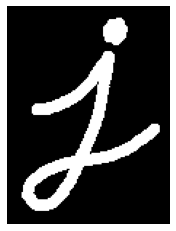

In [ ]:
import matplotlib.pyplot as plt

img = cv2.imread('j.png',0)
plt.axis('off')
plt.imshow(img)              

# **Erosion and Dilation**

Now that we have the image we can perform the firts two operations

In [ ]:
import numpy as np

kernel = np.ones((5,5), np.uint8) # Make the kernel for the operations

img_erosion = cv2.erode(img, kernel, iterations=1)  # Create eroded image
img_dilation = cv2.dilate(img, kernel, iterations=1)  # Create dilated image

# **Plot the results**

Text(0.5, 1.0, 'Dilated image')

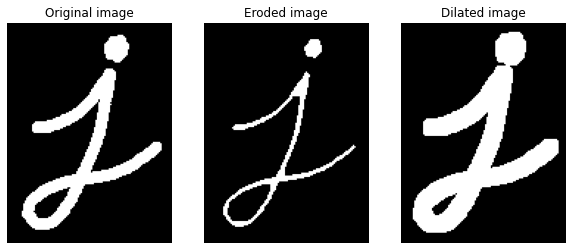

In [ ]:
plt.figure(figsize=(10,6))

# Display original image

ax = plt.subplot(1,3,1)
plt.imshow(img)
plt.gray()
plt.axis('off')
ax.set_title('Original image')

# Display Eroded image

ax = plt.subplot(1,3,2)
plt.imshow(img_erosion)
plt.gray()
plt.axis('off')
ax.set_title('Eroded image')

# Display Dilated image

ax = plt.subplot(1,3,3)
plt.imshow(img_dilation)
plt.gray()
plt.axis('off')
ax.set_title('Dilated image')

# **Add noise**

For the next step we'll add noise to the original images, we'll create a function to do that. It will take as parameters the image and a flag that could be 'white' or 'black', to indicate what kind of noise we want

In [ ]:
def add_noise(img, flag):
  img_noised = img.copy()
  count = 0
  if flag == 'white':
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          pixel = img_noised[i,j]
          count += 1
          if not pixel:
            if not np.random.RandomState(count).randint(0,500):
              for n in range(-2,2):
                for m in range(-2,2):
                  if 0<i+n<img.shape[0] and 0<j+m<img.shape[1]:
                    img_noised[i+n,j+m] = 255
  if flag == 'black':
    for i in range(img.shape[0]):
      for j in range(img.shape[1]):
          pixel = img_noised[i,j]
          count += 1
          if pixel:
            if not np.random.RandomState(count).randint(0,100):
              for n in range(-2,2):
                for m in range(-2,2):
                    img_noised[i+n,j+m] = 0

  return img_noised

# **Perform the operations**

In [ ]:
img_white_noise = add_noise(img, flag='white')
img_black_noise = add_noise(img, flag='black')

# **Plot the results**

Text(0.5, 1.0, 'Image with black noise')

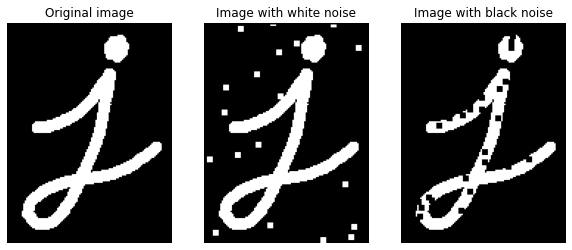

In [ ]:
plt.figure(figsize=(10,6))

# Display original image

ax = plt.subplot(1,3,1)
plt.imshow(img)
plt.gray()
plt.axis('off')
ax.set_title('Original image')

# Display image with white noise

ax = plt.subplot(1,3,2)
plt.imshow(img_white_noise)
plt.gray()
plt.axis('off')
ax.set_title('Image with white noise')

# Display image with black image

ax = plt.subplot(1,3,3)
plt.imshow(img_black_noise)
plt.gray()
plt.axis('off')
ax.set_title('Image with black noise')

# **Opening and Closing**

Now that we have the noised images we can perform the next two operations

In [ ]:
img_opening = cv2.morphologyEx(img_white_noise, cv2.MORPH_OPEN, kernel) # Creates opened image based on image with white noise
img_closing = cv2.morphologyEx(img_black_noise, cv2.MORPH_CLOSE, kernel)  # Creates closed image based on image with black noise

OPENING consists of  an **erosion followed by a dilation** while CLOSING is a **dilation followed by an erosion** 

# **Plot the results**

Text(0.5, 1.0, 'Image with white noise opened')

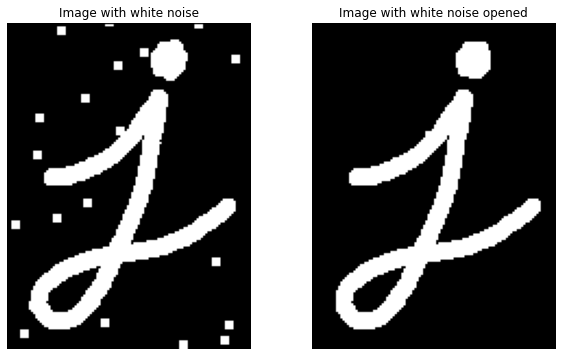

In [ ]:
plt.figure(figsize=(10,6))

# Display image with white noise

ax = plt.subplot(1,2,1)
plt.imshow(img_white_noise)
plt.gray()
plt.axis('off')
ax.set_title('Image with white noise')

# Display image with white noise opened

ax = plt.subplot(1,2,2)
plt.imshow(img_opening)
plt.gray()
plt.axis('off')
ax.set_title('Image with white noise opened')

Text(0.5, 1.0, 'Image with black noise closed')

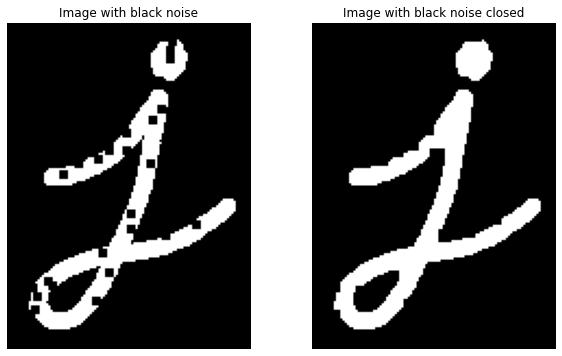

In [ ]:
plt.figure(figsize=(10,6))

# Display image with black noise

ax = plt.subplot(1,2,1)
plt.imshow(img_black_noise)
plt.gray()
plt.axis('off')
ax.set_title('Image with black noise')

# Display image with black noise closed

ax = plt.subplot(1,2,2)
plt.imshow(img_closing)
plt.gray()
plt.axis('off')
ax.set_title('Image with black noise closed')